In [107]:
%reload_kedro
prefix = ""
X_train =  io.load(prefix + 'X_train')
X_test =  io.load(prefix + 'X_test')
X_valid =  io.load(prefix + 'X_valid')
y_train = io.load('y_train')

2019-07-04 20:03:22,081 - INFO - ** Kedro project Twitter Network
2019-07-04 20:03:22,085 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/logging.yml
2019-07-04 20:03:22,098 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/catalog.yml
2019-07-04 20:03:22,152 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/credentials.yml
2019-07-04 20:03:22,158 - INFO - Loading: /Users/tomduke/Documents/Academic/MBusA/Modules/M3 - Advanced Analytics/Machine Learning/twitter-network/conf/base/parameters.yml
2019-07-04 20:03:22,184 - INFO - Defined global variables proj_dir, proj_name, conf and io
2019-07-04 20:03:22,186 - INFO - Loading data from `X_train` (PickleLocalDataSet)...
2019-07-04 20:03:22,207 - INFO - Loading data from `X_test` (PickleLocalDat

In [108]:
print('Number of features:', X_train.shape[1])

Number of features: 31


In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def color_type(var_name):
    if "source" in var_name:
        return "blue"
    elif "sink" in var_name:
        return "red"
    else:
        return "white"

def corr_plot(df, sort = False, order = None, absolute = True, exclude = None):
    fg_color = 'white'
    if order:
        df = df[order]
    f = plt.figure(figsize=(19, 15))
    cor = df.corr()
    if absolute:
        cor = cor.abs()
    if sort:
        cor = cor.sort_values("label", ascending = False)
        cor = cor[list(cor.index)]
    if exclude:
        cor[exclude] = -1
        cor.loc[exclude] = -1
    columns = cor.columns
    plt.matshow(cor, fignum=f.number)
    plt.xticks(range(df.shape[1]), cor.columns, fontsize=14, rotation=90, color = fg_color)
    plt.yticks(range(df.shape[1]), cor.columns, fontsize=14, color = fg_color)

    cb = plt.colorbar()
    cb.set_label('', color=fg_color)
    cb.ax.yaxis.set_tick_params(color=fg_color)
    cb.outline.set_edgecolor(fg_color)

    plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=fg_color)

    cb.ax.tick_params(labelsize=14)

2019-07-04 20:04:43,654 - INFO - Loading data from `included_features` (PickleLocalDataSet)...


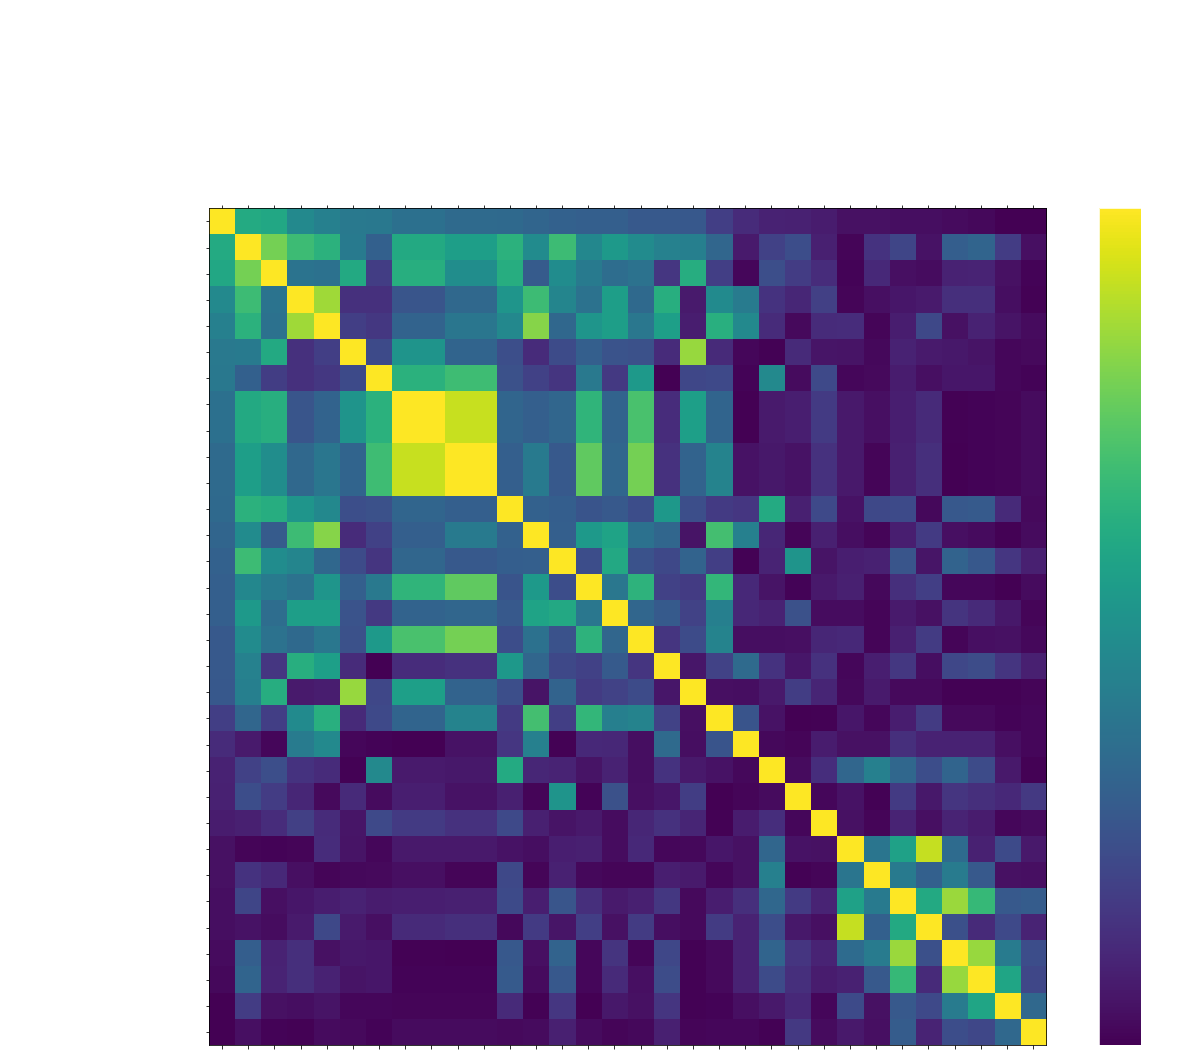

In [115]:
features = io.load("included_features")
df = pd.DataFrame(X_train, columns = features)
df["label"] = np.array(y_train[:len(X_train)])
corr_plot(df, sort = True)

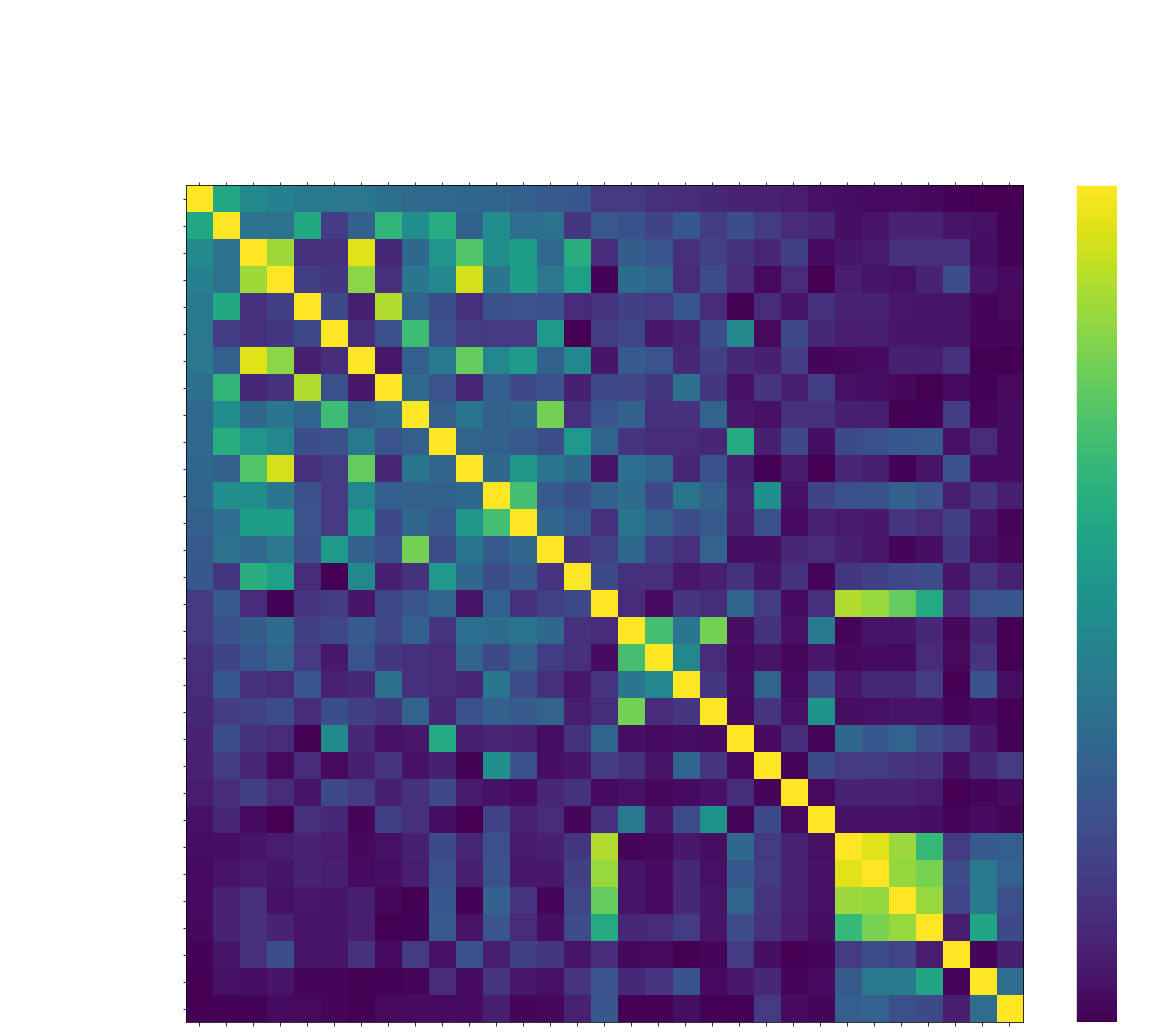

In [94]:
corr_plot(df[included + ["label"]], sort = True)

In [19]:
from sklearn.feature_selection import mutual_info_classif
MI = pd.DataFrame(mutual_info_classif(X_train, y_train), index = X_train.columns, columns = ["MI"])
MI_order = list(MI.sort_values("MI", ascending = False).index); MI_order

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

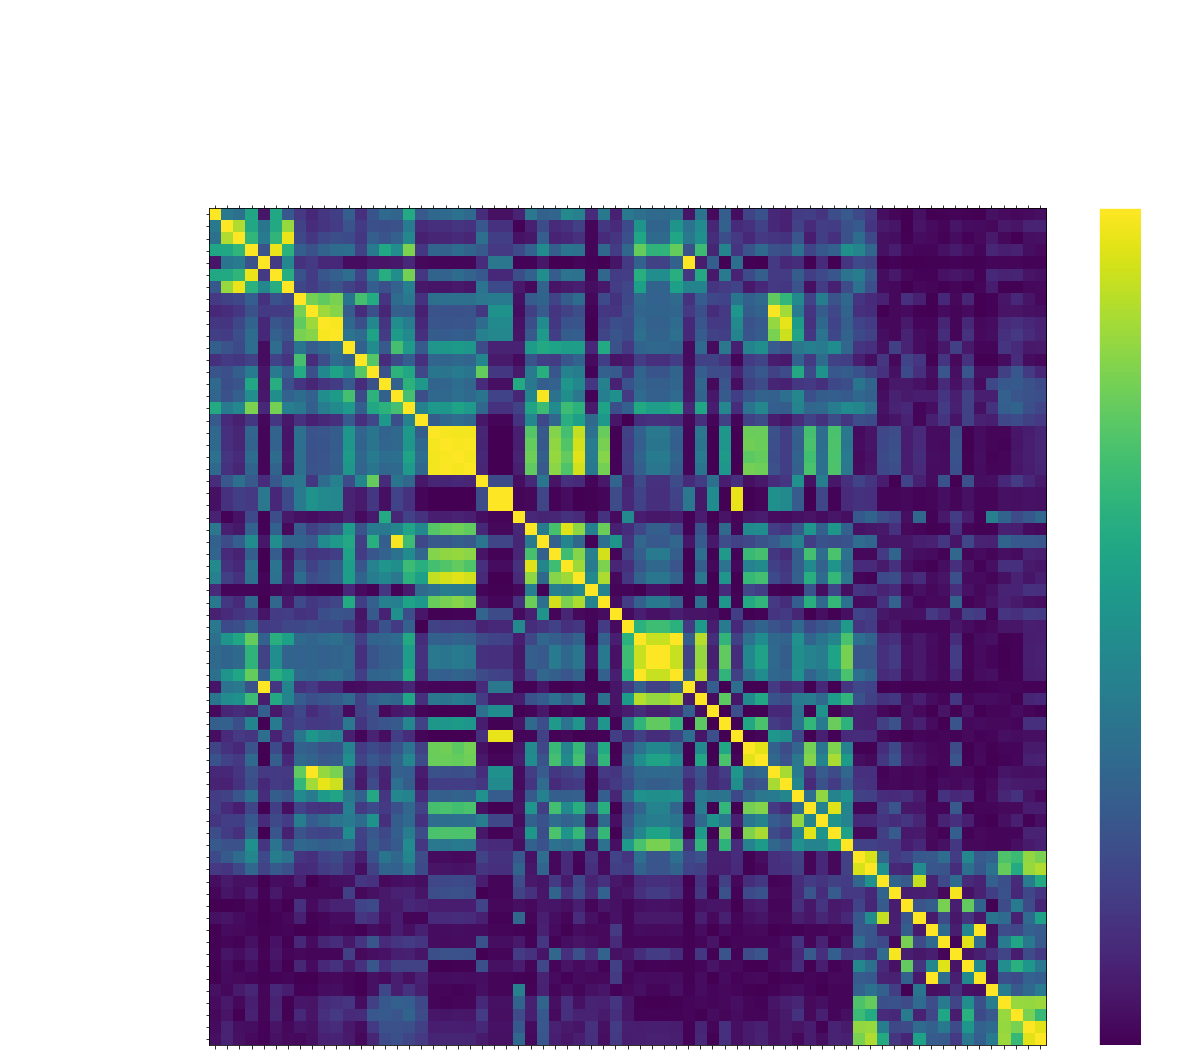

In [83]:
corr_plot(df, order = MI_order)